 <h1><center><strong> Bank Marketing Preduction model (MVP)</strong></center></h1>
 <hr style="color:#E1CF01">

## Step1: Importing Libraries & Reading Data
<hr style="color:#E1CF01">

In [1]:
pip install plotly==5.4.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

In [3]:
pip install xgboost


In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn!=0.22.0 in c:\users\acer\anaconda3\lib\site-packages (from lightgbm) (0.24.1)



In [5]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
#modeling inport 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, recall_score, roc_curve, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Importing SKLearn clssifiers and libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import preprocessing
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import plot_confusion_matrix
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.model_selection import StratifiedKFold


import warnings

In [7]:
# Read dataset 
df = pd.read_csv('bankdata', delimiter=';')

In [8]:
# Show first five rows
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [9]:
# Show last five rows
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [10]:
# Show how many rows and columns
df.shape

(41188, 21)

## Step2: Data Wrangling.
<hr style="color:#E1CF01">

### 1. Data Cleaning

In [11]:
# Assess summary of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
# Assess statistics for each column
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

the "duration" variable is not a good predictor of a potential "yes" because a 0 is an automatic "no" and time spent before a call cannot be known. We will therefore first drop this from our data set

The '999' has significant influence over 'pdays'


In [13]:
# Show null value from all datafream 
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
# Assess if there are any duplicates.
sum(df.duplicated())

12

In [15]:
# Drop duplicates.
df.drop_duplicates(inplace=True)

In [16]:
# Create a list of continous and categortical variables based on data type
cont_vars = []
cat_vars = []

for col in df.columns: 
    if df[col].dtype == 'O':
        cat_vars.append(col)
    else: 
        cont_vars.append(col)

print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

There are 11 categorical variables: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
There are 10 continuous variables: 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [17]:
# Check the number of unique values and the percent each value represents
# For each categoritcal variable
for v in cat_vars:
    print(f'Unique values for {v}: {df[v].nunique()}\n', 
          round(df[v].value_counts(normalize=True)* 100, 2), '\n')

Unique values for job: 12
 admin.           25.30
blue-collar      22.47
technician       16.37
services          9.63
management        7.10
retired           4.17
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.13
unknown           0.80
Name: job, dtype: float64 

Unique values for marital: 4
 married     60.52
single      28.08
divorced    11.20
unknown      0.19
Name: marital, dtype: float64 

Unique values for education: 8
 university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64 

Unique values for default: 3
 no         79.12
unknown    20.88
yes         0.01
Name: default, dtype: float64 

Unique values for housing: 3
 yes        52.39
no         45.21
unknown     2.40
Name: housing, dtype: float64 

Unique valu

default: includes over 20% "unknown"
This would be a large value to impute or drop.
With a very small value for "yes" we could likely safely code all "unknowns" as "no"
But, this is also interesting considering the business problem - it would be interesting to know if lack of knowledge of a default actually positively or negatively contributes to a successful marketing call
We will leave "unknown" in place for now

We will drop 'unknown' from 
- marital
- education
- housing
- loan

In [18]:
#Delete 'unknown' value from columns
df.drop(df.index[df['job']=='unknown'], inplace=True)
df.drop(df.index[df['marital']=='unknown'], inplace=True)
df.drop(df.index[df['education']=='unknown'], inplace=True)
df.drop(df.index[df['housing']=='unknown'], inplace=True)
df.drop(df.index[df['loan']=='unknown'], inplace=True)

In [19]:
df.shape

(38234, 21)

The "999" value for 'pdays', which is the number of days since the customer was previously contacted is very prevalent.

In [20]:
# Check the the number of time '999' occurs relative to other values
df.pdays.value_counts(normalize=True)

999    0.964273
3      0.010279
6      0.009913
4      0.002772
2      0.001491
9      0.001439
12     0.001386
7      0.001360
5      0.001177
10     0.001151
13     0.000863
11     0.000680
1      0.000628
15     0.000575
14     0.000471
0      0.000392
8      0.000366
16     0.000209
17     0.000157
18     0.000131
19     0.000078
22     0.000078
21     0.000052
25     0.000026
26     0.000026
27     0.000026
Name: pdays, dtype: float64

- The placeholder represents over 96% of values
- 0 is also a value, which may mean that a customer had previously been called on the same day

We will create a new binary variable that indicates whether or not a customer had been previously contacted. With only 4% of customers having been previously contacted.

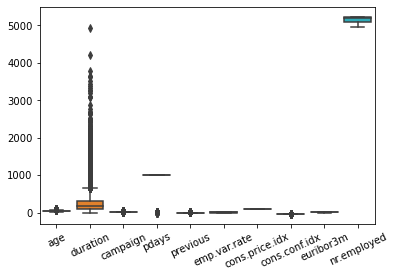

In [21]:
#Check Outlier
sns.boxplot(data=df)
plt.xticks(rotation=25);

In [22]:
#Check Outlier
fig =px.box(df, y="age")
fig.show()

### 1. Feature Engineering

In [23]:
# Drop columns they we don't want it
# df.drop(['pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis=1,inplace=True)
# df.head()

In [24]:
df = df.drop(columns=['duration'], axis=1)

In [25]:
# Rename the column y to subscribed to a deposit.
# df = df.rename(columns = {'y': 'subscribed to a deposit'}, inplace = False)

In [26]:
# Create new column that indidates where or not a customer has been contacted
# Since 999 means "not contacted" we can use that as an identifier

df['p_contacted'] = [0 if x == 999 else 1 for x in df.pdays] 
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...    999         0  nonexistent          1.1   
1   may         mon  ...    999         0  nonexistent          1.1   
2   may         mon  ...    999         0  nonexistent          1.1   
3   may         mon  ...    999         0  nonexistent          1.1   
4   may         mon  ...    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y p_contacted  
0          93.994          -36.4      4.857       5191.0  no           0  
1          93.994          -36.4      4.857       5191.0  no           0  
2          93.994          -36.4      4.857       5191.0  no           0  
3          93.994          -36.4      4.857       5191.0  no           0  
4          93.994          -36.4      4.857       5191.0  no           0  

[5 rows x 21 columns]

In [27]:
# Check value counts for p_contacted
df.p_contacted.value_counts(normalize=True)

0    0.964273
1    0.035727
Name: p_contacted, dtype: float64

In [28]:
# Drop the 'pdays' column
df.drop(columns=['pdays'], inplace=True)
df.head(2)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   

  month day_of_week  campaign  previous     poutcome  emp.var.rate  \
0   may         mon         1         0  nonexistent           1.1   
1   may         mon         1         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  p_contacted  
0          93.994          -36.4      4.857       5191.0  no            0  
1          93.994          -36.4      4.857       5191.0  no            0

## Step3: Exploratory Data Analysis
<hr style="color:#00873e">

### Counts of categorical variables

In [29]:
# create a dataframe with only the categroical variables we observed earlier
cat_data = df[cat_vars]
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  
0         mon  nonexistent  no  
1         mon  nonexistent  no  
2         mon  nonexistent  no  
3         mon  nonexistent  no  
4         mon  nonexistent  no

In [30]:
# add the 'p_contacted' variable to cat_data
cat_data = cat_data.join(df.p_contacted)
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome   y  p_contacted  
0         mon  nonexistent  no            0  
1         mon  nonexistent  no            0  
2         mon  nonexistent  no            0  
3         mon  nonexistent  no            0  
4         mon  nonexistent  no            0

Plot category counts and relationship with 'y'

We'll plot the overall counts of each categorical variable value and look at the rate of "yeses" we got for each to start looking for possible relationships for a successful marketing campaign.

It will help to first turn our target variable 'y' into a binary dummy so that we can get averages

In [31]:
# one-hot encode the target variable 'y'
cat_data.y = pd.get_dummies(cat_data.y, drop_first=True)
cat_data.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week     poutcome  y  p_contacted  
0         mon  nonexistent  0            0  
1         mon  nonexistent  0            0  
2         mon  nonexistent  0            0  
3         mon  nonexistent  0            0  
4         mon  nonexistent  0            0

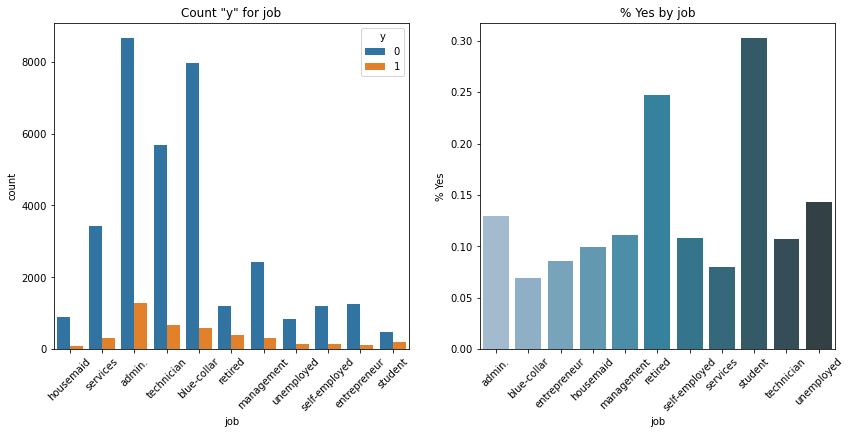

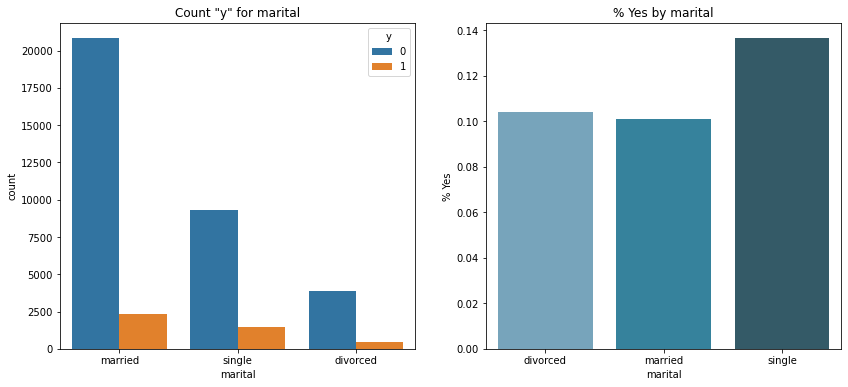

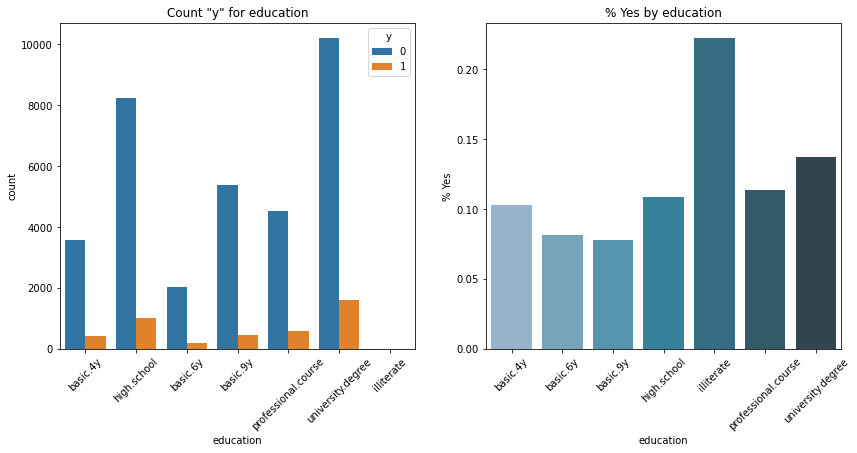

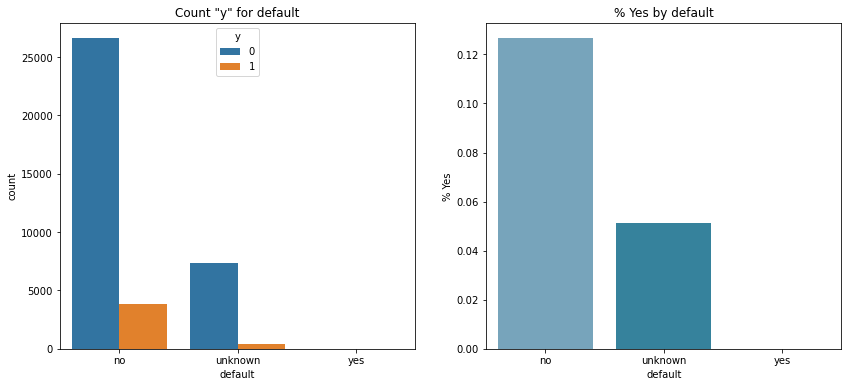

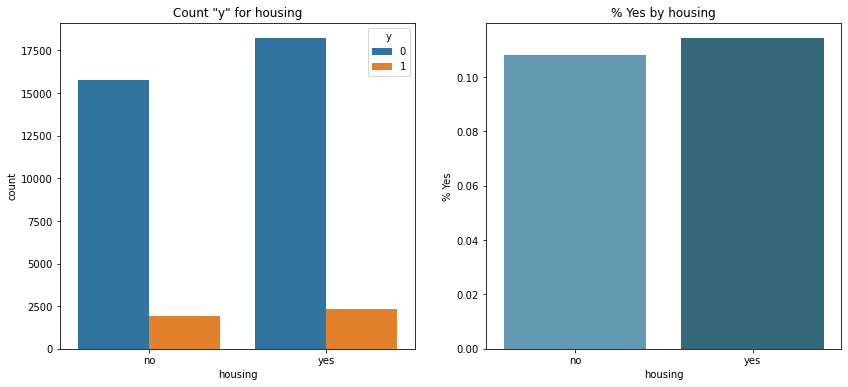

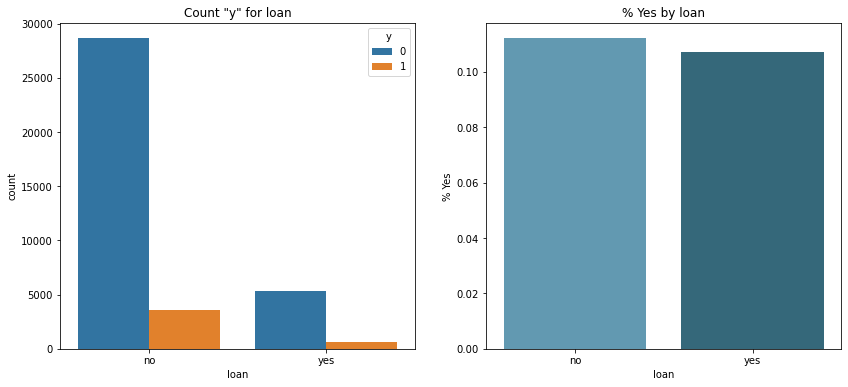

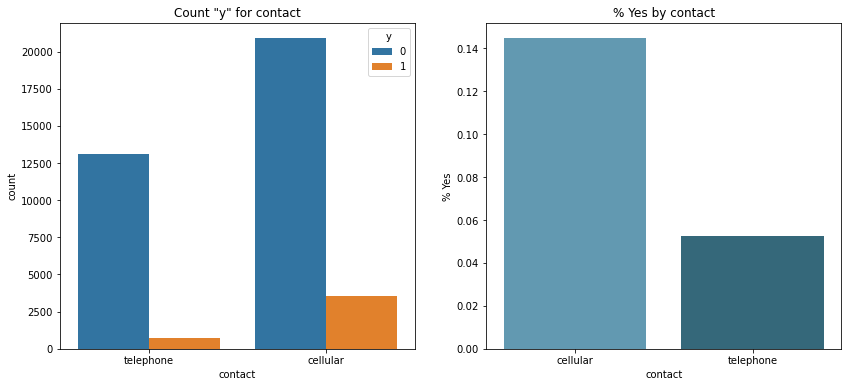

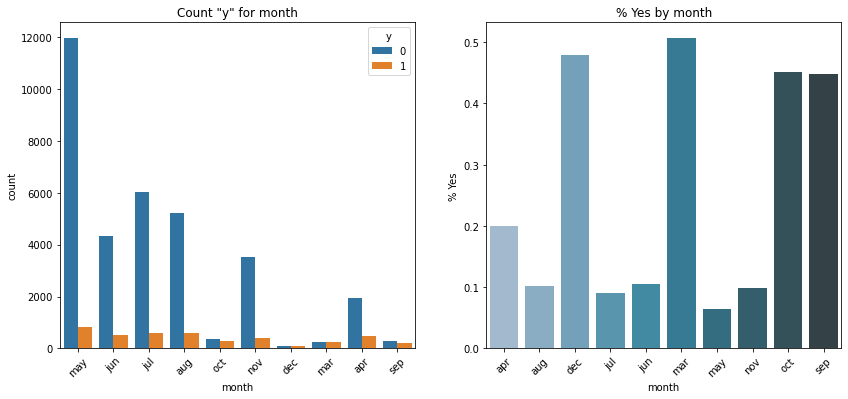

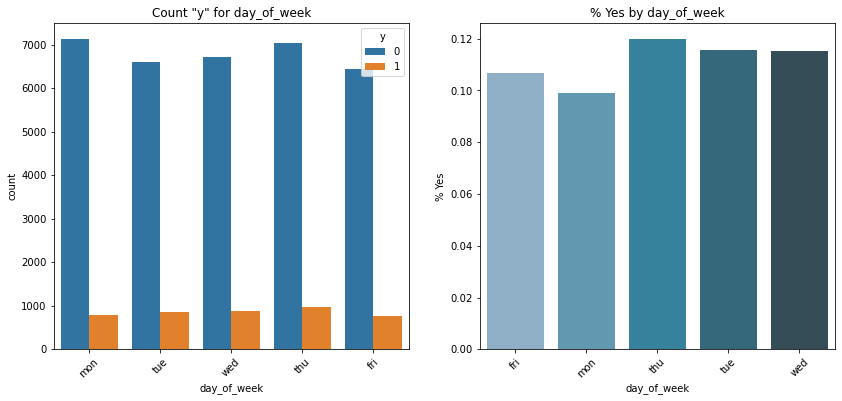

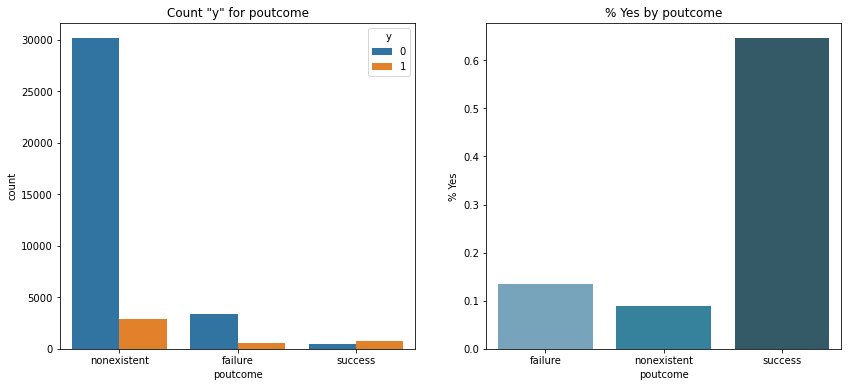

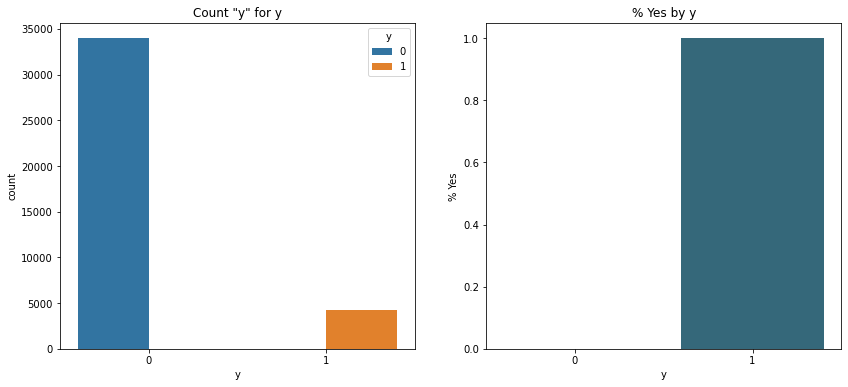

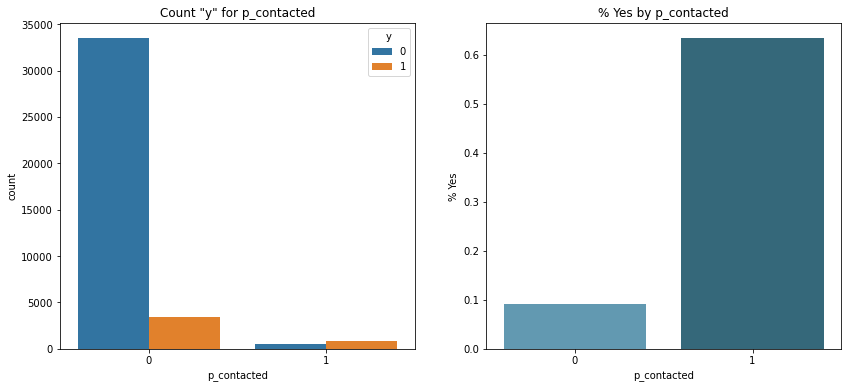

In [32]:
for col in cat_data.columns.values:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_data[col], data=cat_data, hue='y')
    plt.title(f'Count "y" for {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% Yes')
    plt.title(f'% Yes by {col}')
    if cat_data[col].nunique() > 3:
            plt.xticks(rotation=45)

### Distributions of continuous variables

In [33]:
# check the values we have for continuous variables
cont_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [34]:
#drop 'duration' and 'pdays' from the list 
cont_vars.remove('duration')
cont_vars.remove('pdays')
cont_vars

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

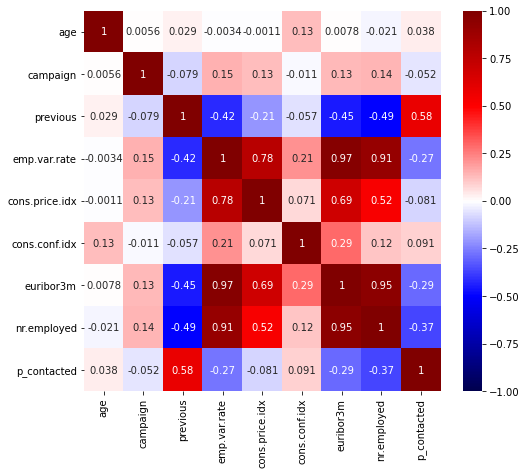

In [35]:
#Plot the correlations between the variables
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

In [36]:
# create a dataframe of continuous variables using our list
cont_data = df[cont_vars]
cont_data.head(2)

age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56         1         0           1.1          93.994          -36.4   
1   57         1         0           1.1          93.994          -36.4   

   euribor3m  nr.employed  
0      4.857       5191.0  
1      4.857       5191.0

In [37]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.24.1


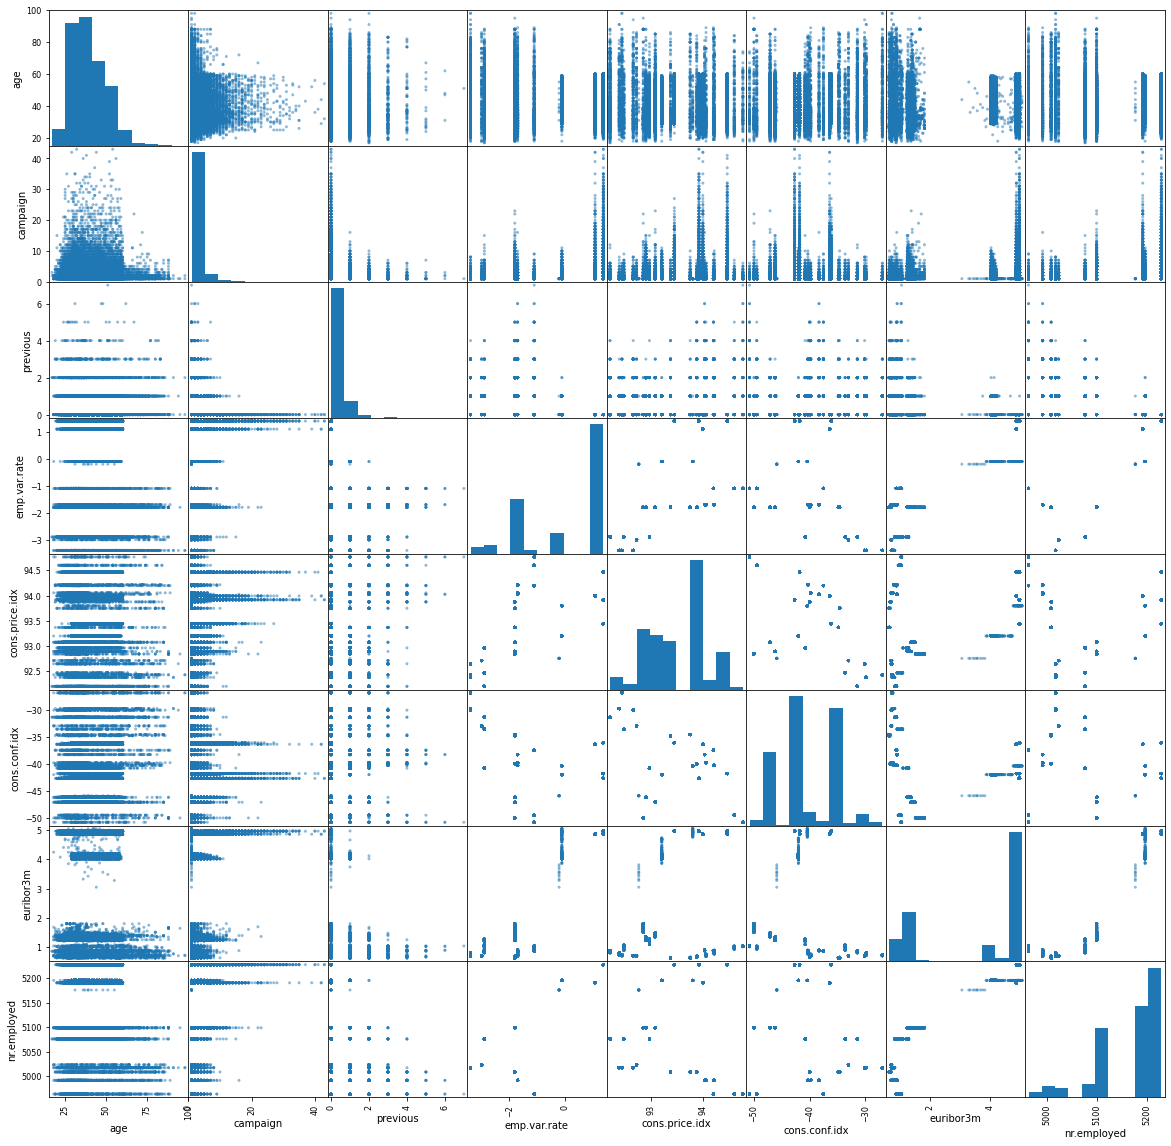

In [38]:
# plot a scatter matrix of all continuous variables and observe realtionships
pd.plotting.scatter_matrix(cont_data, figsize=(20,20));

## Step4: Modeling

In [39]:
# create a copy of our data withour the continuous variables we want to drop
model_data = df.drop(columns=['euribor3m', 'emp.var.rate']).copy()
model_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  previous     poutcome  cons.price.idx  \
0   may         mon         1         0  nonexistent          93.994   
1   may         mon         1         0  nonexistent          93.994   
2   may         mon         1         0  nonexistent          93.994   
3   may         mon         1         0  nonexistent          93.994   
4   may         mon         1         0  nonexistent          93.994   

   cons.conf.idx  nr.employed   y  p_contacted  
0          -36.4       5191.0  no            0  
1          -36.4       5191.0  no            0  
2          -36.4       5191.0  no            0  
3          -36.4       5191.0  no            0  
4          -36.4       5191.0  no            0

In [40]:
# one-hot encode model_data, check the first 5 rows and shape
data_w_dummies = pd.get_dummies(model_data, drop_first=False)
display(data_w_dummies.head())
data_w_dummies.shape

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0   56         1         0          93.994          -36.4       5191.0   
1   57         1         0          93.994          -36.4       5191.0   
2   37         1         0          93.994          -36.4       5191.0   
3   40         1         0          93.994          -36.4       5191.0   
4   56         1         0          93.994          -36.4       5191.0   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  ...  \
0            0           0                0                 0  ...   
1            0           0                0                 0  ...   
2            0           0                0                 0  ...   
3            0           1                0                 0  ...   
4            0           0                0                 0  ...   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                0                1                0                0   
1                0                1                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                1                0                0   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                0                 0                     1                 0   
1                0                 0                     1                 0   
2                0                 0                     1                 0   
3                0                 0                     1                 0   
4                0                 0                     1                 0   

   y_no  y_yes  
0     1      0  
1     1      0  
2     1      0  
3     1      0  
4     1      0  

[5 rows x 57 columns]

(38234, 57)

In [41]:
# check column names
data_w_dummies.columns

Index(['age', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'p_contacted', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_unknown', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_fai

In [42]:
# drop our redundant binary variables and inspect the dataframe
data_w_dummies.drop(columns=['loan_no', 'housing_no', 
                             'contact_telephone', 'y_no'], 
                    inplace=True)
display(data_w_dummies.head())
data_w_dummies.shape

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0   56         1         0          93.994          -36.4       5191.0   
1   57         1         0          93.994          -36.4       5191.0   
2   37         1         0          93.994          -36.4       5191.0   
3   40         1         0          93.994          -36.4       5191.0   
4   56         1         0          93.994          -36.4       5191.0   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  ...  month_sep  \
0            0           0                0                 0  ...          0   
1            0           0                0                 0  ...          0   
2            0           0                0                 0  ...          0   
3            0           1                0                 0  ...          0   
4            0           0                0                 0  ...          0   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                0                1                0                0   
1                0                1                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                1                0                0   

   day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  \
0                0                 0                     1                 0   
1                0                 0                     1                 0   
2                0                 0                     1                 0   
3                0                 0                     1                 0   
4                0                 0                     1                 0   

   y_yes  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 53 columns]

(38234, 53)

In [43]:
# Check the value counts our our target variable
data_w_dummies.y_yes.value_counts(normalize=True)

0    0.888659
1    0.111341
Name: y_yes, dtype: float64

In [44]:
# split out our label (target) data and variables
target = data_w_dummies.y_yes
variables = data_w_dummies.drop(columns=['y_yes'])

In [45]:
# check to ensure we've kept the right data
variables.head()

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0   56         1         0          93.994          -36.4       5191.0   
1   57         1         0          93.994          -36.4       5191.0   
2   37         1         0          93.994          -36.4       5191.0   
3   40         1         0          93.994          -36.4       5191.0   
4   56         1         0          93.994          -36.4       5191.0   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  ...  month_oct  \
0            0           0                0                 0  ...          0   
1            0           0                0                 0  ...          0   
2            0           0                0                 0  ...          0   
3            0           1                0                 0  ...          0   
4            0           0                0                 0  ...          0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0                0                1                0   
1          0                0                1                0   
2          0                0                1                0   
3          0                0                1                0   
4          0                0                1                0   

   day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0                0                0                 0                     1   
1                0                0                 0                     1   
2                0                0                 0                     1   
3                0                0                 0                     1   
4                0                0                 0                     1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 52 columns]

In [46]:
# split our date into train and test sets and store in a dictionary 'original_data'
X_train, X_test, y_train, y_test = train_test_split(variables, 
                                                    target, 
                                                    test_size=.25,
                                                    random_state= 175)

original_data = {'X_train': X_train, 'y_train':y_train,
                 'X_test': X_test, 'y_test':y_test}

In [47]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
# fit and transform our traing and test data
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# the StandardScaler turns our data into an array, so if we want to see what
# it looks like with our column names we'll need to put it back into a dataframe
scaled_df_train = pd.DataFrame(scaled_data_train, 
                               columns=variables.columns)

scaled_df_test = pd.DataFrame(scaled_data_test, 
                              columns=variables.columns)

display(scaled_df_train.head(2))
display(scaled_df_test.head(2))

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0  0.209312 -0.565724 -0.347046       -0.221044       0.961231      0.84359   
1 -1.053594 -0.565724 -0.347046        0.603204      -0.469901      0.84359   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  ...  month_oct  \
0    -0.194573   -0.590466        -0.536505         -0.192342  ...   -0.13335   
1    -0.194573    1.693577        -0.536505         -0.192342  ...   -0.13335   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0  -0.116196        -0.483046        -0.514401         1.950794   
1  -0.116196        -0.483046        -0.514401         1.950794   

   day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0        -0.493999        -0.495801         -0.335493              0.394223   
1        -0.493999        -0.495801         -0.335493              0.394223   

   poutcome_success  
0         -0.185712  
1         -0.185712  

[2 rows x 52 columns]

age  campaign  previous  cons.price.idx  cons.conf.idx  nr.employed  \
0 -0.373568  1.945721 -0.347046        0.603204      -0.469901     0.843590   
1  1.472218 -0.565724 -0.347046        0.735362       0.896180     0.327768   

   p_contacted  job_admin.  job_blue-collar  job_entrepreneur  ...  month_oct  \
0    -0.194573    1.693577        -0.536505         -0.192342  ...   -0.13335   
1    -0.194573    1.693577        -0.536505         -0.192342  ...   -0.13335   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0  -0.116196        -0.483046        -0.514401        -0.512612   
1  -0.116196        -0.483046        -0.514401         1.950794   

   day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0        -0.493999         2.016940         -0.335493              0.394223   
1        -0.493999        -0.495801         -0.335493              0.394223   

   poutcome_success  
0         -0.185712  
1         -0.185712  

[2 rows x 52 columns]

In [49]:
# put our scaled data in a dictionary for ease of working with it later
scaled_data = {'X_train': scaled_df_train, 'y_train':y_train, 
               'X_test': scaled_df_test, 'y_test':y_test}

In [50]:
model_results = pd.DataFrame(columns=['model','data','train_accuracy', 
                                      'test_accuracy', 'precision','recall', 
                                      'f1_score'])
model_results

Empty DataFrame
Columns: [model, data, train_accuracy, test_accuracy, precision, recall, f1_score]
Index: []

In [51]:
# create a helper function that fits a model to training data
# captures performance metrics, and records them in our dataframe
def add_model_results(model, data, model_name, data_name, df=model_results):
    
    model.fit(data['X_train'], data['y_train'])
    train_preds = model.predict(data['X_train'])
    test_preds = model.predict(data['X_test'])
    p_score = precision_score(data['y_test'], test_preds)
    r_score = recall_score(data['y_test'], test_preds)
    train_accuracy = accuracy_score(data['y_train'], train_preds)
    test_accuracy = accuracy_score(data['y_test'], test_preds)
    f_score = f1_score(data['y_test'], test_preds)
    
    scores = [{'model': model_name, 'data': data_name, 
               'train_accuracy': round(train_accuracy, 3),
               'test_accuracy': round(test_accuracy, 3),
               'precision': round(p_score, 3),
               'recall':round(r_score, 3),
               'f1_score': round(f_score, 3)}]
    
    df = model_results.append(scores, ignore_index=True)
    
    return df

In [52]:
## Specify the classifier, in this case LogisticRegression()
logreg = LogisticRegression(random_state=175, solver='lbfgs', max_iter=1000)

In [53]:
# put our diffent data treatments in a list for easy iteration
modeling_data1 = [original_data, scaled_data, ]
modeling_data1_names = ['original_data', 'scaled_data',]

In [54]:
# fit the logreg model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=logreg,
                                      data=d,
                                      model_name="LogisticRegression",
                                      data_name = modeling_data1_names[i])
    print('LogisticRegression: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], logreg.predict(d['X_test'])), '\n')
    
model_results

LogisticRegression: original_data
[[8396  132]
 [ 817  214]] 

LogisticRegression: scaled_data
[[8389  139]
 [ 806  225]] 



model           data  train_accuracy  test_accuracy  \
0  LogisticRegression  original_data           0.900          0.901   
1  LogisticRegression    scaled_data           0.901          0.901   

   precision  recall  f1_score  
0      0.618   0.208     0.311  
1      0.618   0.218     0.323

In [55]:
## Create a parameter grid to identify optimal parameters
logreg_param_grid = {'C':[.5,1,2],
                     'solver':['lbfgs', 'liblinear'],
                     'class_weight': ['balanced', None]}

In [56]:
# establish the gridsearch model for logreg
logreg_gs = GridSearchCV(logreg, 
                         logreg_param_grid,
                         cv=3, 
                         scoring='recall',
                         n_jobs=-1)

In [57]:
# fit the logreg_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=logreg_gs,
                                      data=d,
                                      model_name="GridSearch-logreg",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-logreg: ', modeling_data1_names[i])
    print('Best parameters: ',  logreg_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], logreg_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-logreg:  original_data
Best parameters:  {'C': 1, 'class_weight': 'balanced', 'solver': 'lbfgs'} 

[[7390 1138]
 [ 423  608]] 

GridSearch-logreg:  scaled_data
Best parameters:  {'C': 0.5, 'class_weight': 'balanced', 'solver': 'liblinear'} 

[[7205 1323]
 [ 404  627]] 



model           data  train_accuracy  test_accuracy  \
0  LogisticRegression  original_data           0.900          0.901   
1  LogisticRegression    scaled_data           0.901          0.901   
2   GridSearch-logreg  original_data           0.836          0.837   
3   GridSearch-logreg    scaled_data           0.820          0.819   

   precision  recall  f1_score  
0      0.618   0.208     0.311  
1      0.618   0.218     0.323  
2      0.348   0.590     0.438  
3      0.322   0.608     0.421

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [59]:
# fit the logreg model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=knn_clf,
                                      data=d,
                                      model_name="KNeighborsClassifier",
                                      data_name = modeling_data1_names[i])
    print('KNeighborsClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], knn_clf.predict(d['X_test'])), '\n')
    
model_results

KNeighborsClassifier: original_data
[[8233  295]
 [ 754  277]] 

KNeighborsClassifier: scaled_data
[[8270  258]
 [ 777  254]] 



model           data  train_accuracy  test_accuracy  \
0    LogisticRegression  original_data           0.900          0.901   
1    LogisticRegression    scaled_data           0.901          0.901   
2     GridSearch-logreg  original_data           0.836          0.837   
3     GridSearch-logreg    scaled_data           0.820          0.819   
4  KNeighborsClassifier  original_data           0.913          0.890   
5  KNeighborsClassifier    scaled_data           0.912          0.892   

   precision  recall  f1_score  
0      0.618   0.208     0.311  
1      0.618   0.218     0.323  
2      0.348   0.590     0.438  
3      0.322   0.608     0.421  
4      0.484   0.269     0.346  
5      0.496   0.246     0.329

In [60]:
## Create a parameter grid to identify optimal parameters
#knn_param_grid = {'n_neighbors':[3,5,7],
                  #   'weights':['uniform', 'distance'],
                   #  'p': [1, 2, 3]}

In [61]:
#knn_clf_gs = GridSearchCV(knn_clf,
                        #  knn_param_grid,
                         # scoring='recall', 
                          #cv=3,
                          #n_jobs=-1)

In [62]:
#model_results = add_model_results(model=knn_clf_gs, 
  #                                data=scaled_data, 
   #                               model_name='GridSearch-KNN',
    #                              data_name='scaled_data')

#print('KNN Best Parameters: ', knn_clf_gs.best_params_)

#print(confusion_matrix(scaled_data['y_test'], 
 #                      knn_clf_gs.predict(scaled_data['X_test'])))


#model_results

In [63]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5) 

In [64]:
# fit the tree_clf model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf,
                                      data=d,
                                      model_name="DecisionTreeClassifier",
                                      data_name = modeling_data1_names[i])
    print('DecisionTreeClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], tree_clf.predict(d['X_test'])), '\n')
    
model_results

DecisionTreeClassifier: original_data
[[8379  149]
 [ 789  242]] 

DecisionTreeClassifier: scaled_data
[[8379  149]
 [ 789  242]] 



model           data  train_accuracy  test_accuracy  \
0      LogisticRegression  original_data           0.900          0.901   
1      LogisticRegression    scaled_data           0.901          0.901   
2       GridSearch-logreg  original_data           0.836          0.837   
3       GridSearch-logreg    scaled_data           0.820          0.819   
4    KNeighborsClassifier  original_data           0.913          0.890   
5    KNeighborsClassifier    scaled_data           0.912          0.892   
6  DecisionTreeClassifier  original_data           0.903          0.902   
7  DecisionTreeClassifier    scaled_data           0.903          0.902   

   precision  recall  f1_score  
0      0.618   0.208     0.311  
1      0.618   0.218     0.323  
2      0.348   0.590     0.438  
3      0.322   0.608     0.421  
4      0.484   0.269     0.346  
5      0.496   0.246     0.329  
6      0.619   0.235     0.340  
7      0.619   0.235     0.340

In [65]:
# Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,None],
                   'min_samples_split': [5, 25, 50, 100]}

In [66]:
# fit the gridsearch to the tree classifier and prioritize recall
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [67]:
# fit the tree_clf_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf_gs,
                                      data=d,
                                      model_name="GridSearch-tree",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-tree: ', modeling_data1_names[i])
    print('Best parameters: ',  tree_clf_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], tree_clf_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-tree:  original_data
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5} 

[[7890  638]
 [ 708  323]] 

GridSearch-tree:  scaled_data
Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5} 

[[7906  622]
 [ 705  326]] 



model           data  train_accuracy  test_accuracy  \
0      LogisticRegression  original_data           0.900          0.901   
1      LogisticRegression    scaled_data           0.901          0.901   
2       GridSearch-logreg  original_data           0.836          0.837   
3       GridSearch-logreg    scaled_data           0.820          0.819   
4    KNeighborsClassifier  original_data           0.913          0.890   
5    KNeighborsClassifier    scaled_data           0.912          0.892   
6  DecisionTreeClassifier  original_data           0.903          0.902   
7  DecisionTreeClassifier    scaled_data           0.903          0.902   
8         GridSearch-tree  original_data           0.966          0.859   
9         GridSearch-tree    scaled_data           0.966          0.861   

   precision  recall  f1_score  
0      0.618   0.208     0.311  
1      0.618   0.218     0.323  
2      0.348   0.590     0.438  
3      0.322   0.608     0.421  
4      0.484   0.269     0.346  
5      0.496   0.246     0.329  
6      0.619   0.235     0.340  
7      0.619   0.235     0.340  
8      0.336   0.313     0.324  
9      0.344   0.316     0.329

In [68]:
# set the optimal parameters for the tree clf and fit again
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=25) 
tree_clf.fit(X=original_data['X_train'], y=original_data['y_train'])

DecisionTreeClassifier(criterion='entropy', min_samples_split=25)

In [69]:
## Create a parameter grid to identify optimal parameters
tree_param_grid = {'criterion':['gini', 'entropy'],
                   'max_depth':[3,4,5,7],
                   'min_samples_split': [5, 25, 50, 100]}

In [70]:
# fit the gridsearch to the tree classifier and prioritize recall
tree_clf_gs = GridSearchCV(tree_clf,
                          tree_param_grid,
                          scoring='recall', 
                          cv=3,
                          n_jobs=-1)

In [71]:
# fit the tree_clf_gs model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=tree_clf_gs,
                                      data=d,
                                      model_name="GridSearch-tree_2",
                                      data_name = modeling_data1_names[i])
    print('GridSearch-tree2: ', modeling_data1_names[i])
    print('Best parameters: ',  tree_clf_gs.best_params_, '\n')
    print(confusion_matrix(d['y_test'], tree_clf_gs.predict(d['X_test'])), '\n')
    
model_results

GridSearch-tree2:  original_data
Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 100} 

[[8334  194]
 [ 754  277]] 

GridSearch-tree2:  scaled_data
Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 100} 

[[8334  194]
 [ 754  277]] 



model           data  train_accuracy  test_accuracy  \
0       LogisticRegression  original_data           0.900          0.901   
1       LogisticRegression    scaled_data           0.901          0.901   
2        GridSearch-logreg  original_data           0.836          0.837   
3        GridSearch-logreg    scaled_data           0.820          0.819   
4     KNeighborsClassifier  original_data           0.913          0.890   
5     KNeighborsClassifier    scaled_data           0.912          0.892   
6   DecisionTreeClassifier  original_data           0.903          0.902   
7   DecisionTreeClassifier    scaled_data           0.903          0.902   
8          GridSearch-tree  original_data           0.966          0.859   
9          GridSearch-tree    scaled_data           0.966          0.861   
10       GridSearch-tree_2  original_data           0.905          0.901   
11       GridSearch-tree_2    scaled_data           0.905          0.901   

    precision  recall  f1_score  
0       0.618   0.208     0.311  
1       0.618   0.218     0.323  
2       0.348   0.590     0.438  
3       0.322   0.608     0.421  
4       0.484   0.269     0.346  
5       0.496   0.246     0.329  
6       0.619   0.235     0.340  
7       0.619   0.235     0.340  
8       0.336   0.313     0.324  
9       0.344   0.316     0.329  
10      0.588   0.269     0.369  
11      0.588   0.269     0.369

In [72]:
# call our random forest classifier and establish baseline parameters
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

In [73]:
# fit the forest model to each set of data we have, show confusion matrices
# show the datatrame with model results
for i,d in enumerate(modeling_data1):
    model_results = add_model_results(model=forest,
                                      data=d,
                                      model_name="RandomForestClassifier",
                                      data_name = modeling_data1_names[i])
    print('RandomForestClassifier: ' + modeling_data1_names[i])
    print(confusion_matrix(d['y_test'], forest.predict(d['X_test'])), '\n')
    
model_results

RandomForestClassifier: original_data
[[8457   71]
 [ 872  159]] 

RandomForestClassifier: scaled_data
[[8457   71]
 [ 874  157]] 



model           data  train_accuracy  test_accuracy  \
0       LogisticRegression  original_data           0.900          0.901   
1       LogisticRegression    scaled_data           0.901          0.901   
2        GridSearch-logreg  original_data           0.836          0.837   
3        GridSearch-logreg    scaled_data           0.820          0.819   
4     KNeighborsClassifier  original_data           0.913          0.890   
5     KNeighborsClassifier    scaled_data           0.912          0.892   
6   DecisionTreeClassifier  original_data           0.903          0.902   
7   DecisionTreeClassifier    scaled_data           0.903          0.902   
8          GridSearch-tree  original_data           0.966          0.859   
9          GridSearch-tree    scaled_data           0.966          0.861   
10       GridSearch-tree_2  original_data           0.905          0.901   
11       GridSearch-tree_2    scaled_data           0.905          0.901   
12  RandomForestClassifier  original_data           0.900          0.901   
13  RandomForestClassifier    scaled_data           0.900          0.901   

    precision  recall  f1_score  
0       0.618   0.208     0.311  
1       0.618   0.218     0.323  
2       0.348   0.590     0.438  
3       0.322   0.608     0.421  
4       0.484   0.269     0.346  
5       0.496   0.246     0.329  
6       0.619   0.235     0.340  
7       0.619   0.235     0.340  
8       0.336   0.313     0.324  
9       0.344   0.316     0.329  
10      0.588   0.269     0.369  
11      0.588   0.269     0.369  
12      0.691   0.154     0.252  
13      0.689   0.152     0.249

In [74]:
# this script is necessary to run to keep XGBoost from killing the kernal
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [75]:
# Instantiate XGBClassifier
xgb_clf = XGBClassifier()

In [76]:
# fit the xgb_clf model to the original data and show the confusion matrix 
model_results = add_model_results(model=xgb_clf, 
                                  data=original_data, 
                                  model_name='XGBClassifier',
                                  data_name='original_data')

print(confusion_matrix(original_data['y_test'], 
                       xgb_clf.predict(original_data['X_test'])))

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[8318  210]
 [ 760  271]]


In [78]:
model_results.tail()

model           data  train_accuracy  test_accuracy  \
11       GridSearch-tree_2    scaled_data           0.905          0.901   
12  RandomForestClassifier  original_data           0.900          0.901   
13  RandomForestClassifier    scaled_data           0.900          0.901   
14           XGBClassifier  original_data           0.929          0.899   
15           XGBClassifier    scaled_data           0.929          0.899   

    precision  recall  f1_score  
11      0.588   0.269     0.369  
12      0.691   0.154     0.252  
13      0.689   0.152     0.249  
14      0.563   0.263     0.358  
15      0.563   0.263     0.358